In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from numpy import random

In [2]:
def jdwucha(A1,data2):
    dist_temp = np.abs(A1 - data2) / (Num1)
    dist = dist_temp.sum(axis=0)
    return dist

In [3]:
def xdwucha(data1,data2):                 #data1是预测的矩阵；data2是要做比较的真实矩阵
    dist_temp = (np.abs((data1 - data2)/data2))/(Num1)
    dist = dist_temp.sum(axis=0)
    return dist

In [9]:
def MSE(A1,data2):
    dist_temp = (np.power((A1 - data2),2))/Num1
    dist = dist_temp.sum(axis=0)
    return dist

绝对误差：CO      0.130040
NO2     0.122483
SO3     0.187162
O3      0.088433
PM25    0.193022
PM10    0.237939
dtype: float64
相对误差：CO      2.714684
NO2     1.181712
SO3     0.842732
O3           inf
PM25    3.072213
PM10    2.395467
dtype: float64
欧式距离：0.05914958503018296
MSE：CO      0.023912
NO2     0.046040
SO3     0.047913
O3      0.016304
PM25    0.090290
PM10    0.125407
dtype: float64
RMSE:CO      0.154633
NO2     0.214570
SO3     0.218891
O3      0.127689
PM25    0.300484
PM10    0.354129
dtype: float64


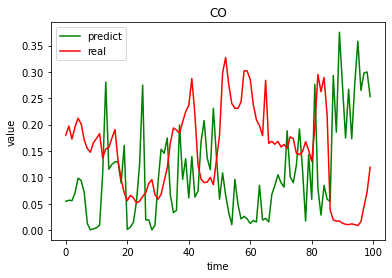

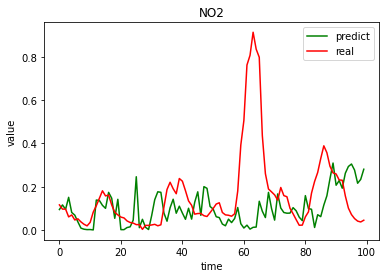

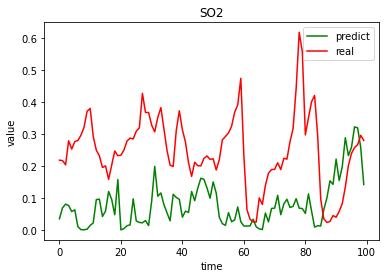

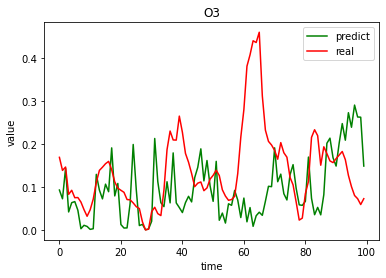

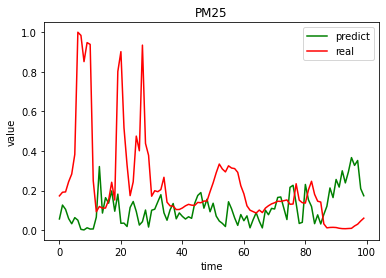

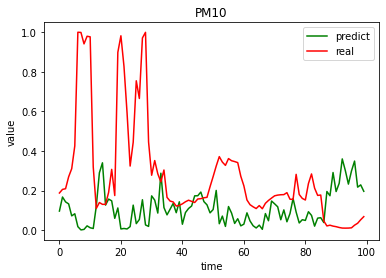

In [10]:
def RMSE(M):
    dist = np.power(M,0.5)
    return dist

In [ ]:
def fanguiy(A1):#反归一化
    A2 = A1.copy()
    for j in range(0,Num2):
        madata = max(data[:, j])
        midata = min(data[:, j])
        A2[:,j] = A1[:,j] * (madata - midata) + midata

    return A2